# Общие сведения о проекте

Поект по планированию рекламной компанни игр на 2017-й год
дан набор с историческими данными (до 2016 года) о продажах видеоигр для различных платформ
задача:
разработать рекламную стратегию по продаже видеоигр на 2017 год

Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

План работы:
<ol>
<li>Предварительный анализ данных
    <ol>
    <li> посмотреть распределение
    <li> посмотреть на данные и проверить их типы
    <li> проверить пропуски
    <li> построить первичные гистограммы
    </ol>
<li>Предобработка данных</li>
    <ol>
    <li> при возможности исправить выявленные недостатки
    </ol>
<li>Исследовательский анализ данных
    <ol> 
    <li> Проверить сколько игр выпускалось в разные годы.
    <li> Выяснить, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    <li> Выявить платформы лидирующие по продажам.
    <li> Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    <li> Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    <li> Соотнесите выводы с продажами игр на других платформах.
    <li>Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    </ol>
<li>Составьте портрет пользователя каждого региона
   <ol> <li>Определите для пользователя каждого региона (NA, EU, JP):
    <li>Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    <li>Самые популярные жанры (топ-5). Поясните разницу.
    <li>Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    </ol>    
<li>Проверка гипотез
<ol>
    <li>Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
<li>проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PlayStation одинаковые.  
</ol>
<li> Выводы
</ol>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try:
    data_game = pd.read_csv(
        '/home/oslik/Yandex_curs_DS/final_proj_s1/datasets/games.csv')
except:
    data_game = pd.read_csv(
        'https://code.s3.yandex.net/datasets/games.csv')
data_game.describe()

In [4]:
old_count = data_game.shape[0]
data_game.head()

In [5]:
data_game.dtypes

In [6]:
data_game.info()

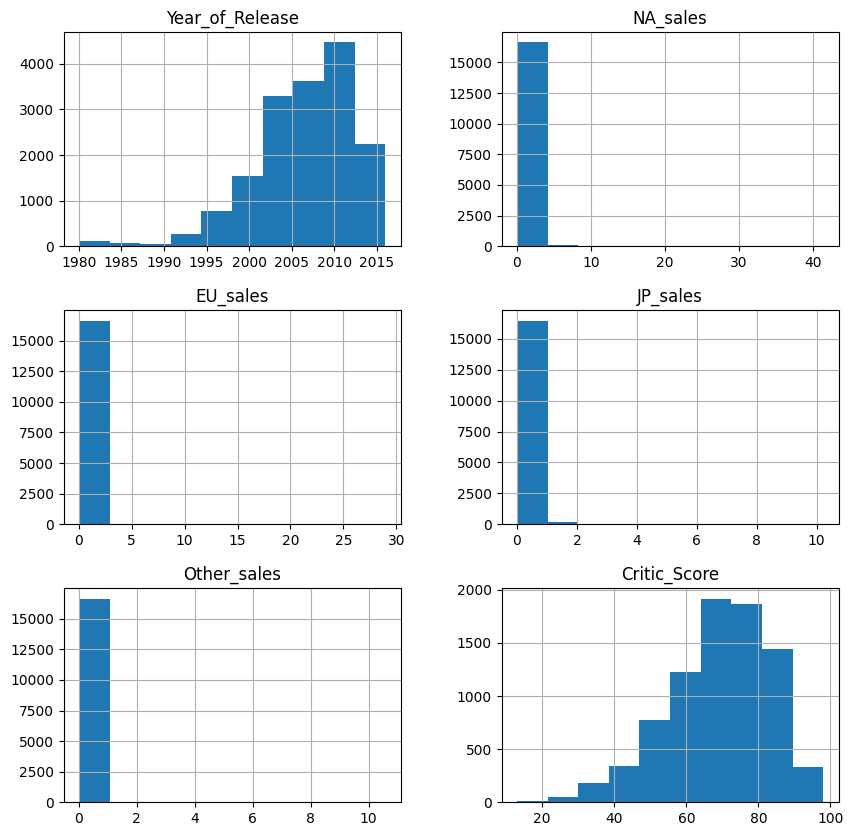

In [7]:
data_game.hist(figsize = (10,10))        #, color= 'orange'
plt.show()

In [8]:
print('число явных дубликатов', data_game.duplicated().sum())

<lo>
     <li>поменять регистр имен столбцов </li>
<li>поменять типы.. год издания- число(int) </li>
<li>понять, что делать с пропусками в столбцах:</li>
<li> - год выпуска;</li>
<li> - название;</li>
<li> - жанр;</li>
<li> - оценки криттиков и пользовательские;</li>
<li> - возрастной ценз.</li>
</lo>
столбцы с оценками критиков и пользователей привести к одному виду.

переименуем все столбцы

# Предобработка данных

In [9]:
data_game.columns = [item.lower() for item in data_game.columns]  # columns.lower()

посмотрим что за данные в critic_score

In [10]:
data_game.critic_score.unique()

посмотрим что за данные в user_score

In [11]:
data_game.user_score.unique()

In [12]:
data_game.query('user_score == "tbd"').head()

значение `tbd` это вероятно `to be determined` (будет определенно/подлежит определению)
судя по тому, что в наборе с такими данными присутствуют игры разлечающиеся по жанру, продажам и дате выпуска, скорее всего, таким образом заполнялись пропуски и это значение нужно поменять на пустое (nan)

In [13]:
data_game.loc[data_game.user_score == "tbd", 'user_score'] = np.nan

In [14]:
data_game.user_score = data_game['user_score'].astype('float64', errors='ignore')

для приведения оценок которые поставили критики и пользователи к единому виду разделим первые на 10 

In [15]:
data_game.critic_score = data_game.critic_score / 10

In [16]:
data_game.critic_score.unique()

пустые значения в этих столбцах обратотать не получится, так как в них содержится оценочное суждение, которое просчитать нельзя. удаление этих данных невозможно, так как число строк в этих столбцах, с пустыми значениями привышает 1%. eдинственная возможность обработки получение данные из внешних источников. так как дополнительных данных найти не удалось, оставим как есть.

посмотрим на пропуски в завании игр

In [17]:
data_game[data_game.genre.isna()]

данных мало и они мусорные, можно удалить

In [18]:
data_game = data_game[~data_game.genre.isna()]

посмотрим на пропуски в данных отражающие возрастной рейтинг

In [19]:
data_game[data_game.rating.isna()].head(5)

встречаются игры с рзным рейтингом. заполнять пустые значения сгенерированными данными нецелесообразно. оставим как есть. 

In [20]:
data_game[data_game.year_of_release.isna()].head(10)

для заполнения пропусков недостаточно данных, нужно получить данные из внешних источников, что сделать не получилось. 

заменим тип данных для года на числовой так как заменять на data time нет смысла, в сязи с избыточностью

In [21]:
data_game['year_of_release'] = np.floor(
    pd.to_numeric(
        data_game['year_of_release'],
        errors='coerce')).astype('Int64')

посчитаем сумму всех продаж

In [22]:
data_game['all_sales'] = sum((
    data_game.na_sales,
    data_game.jp_sales,
    data_game.eu_sales,
    data_game.other_sales,))

In [23]:
data_game.head()

## Краткие выводы

столбцы в наборе приведены к принятому виду. 
прсмотренны пропуски в столбцах:
<li> - год выпуска;</li>
<li> - название;</li>
<li> - жанр;</li>
<li> - оценки криттиков и пользовательские;</li>
<li> - возрастной ценз.</li>
изменить или заполнить данные в настоящий момент с текущими данными невозможно.
изменен тип данных в столбце с датой выпуска игры на целочисленный, так будет проще работать с данными.

# Исследовательский анализ данных

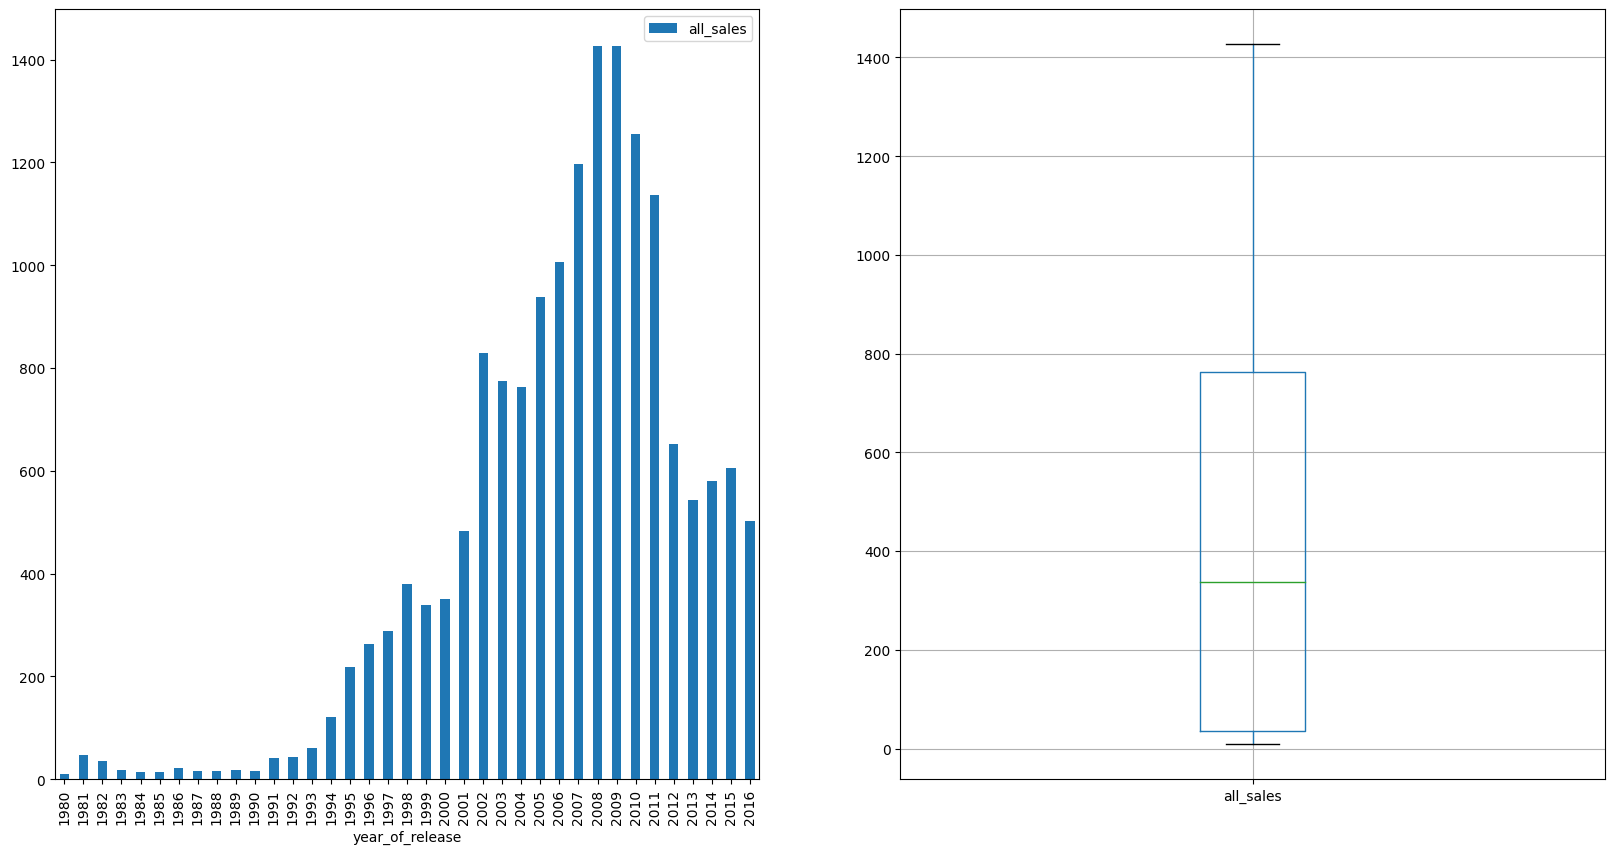

In [24]:
df=data_game.pivot_table(index='year_of_release', values='all_sales', aggfunc='count')
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
df.plot(ax=ax[0],
        kind='bar'
       )
df.boxplot(ax=ax[1])
plt.show()

<div class="alert alert-info">
<b> Вывод</b>
<p>данные распределены почти нормально, немго смещены в право. с двумя небольшими спадами в районе 1999-2000 и 2003-2004 и небольшим подъемом в районе 2014 года. пик продаж приходится на 2008-2009 года
<p>Примерно с 1993 года начался сильный рост игровой индустрии, что может быть обусловлено поялением 32 битных консолей, и новых игр к ним. спады в районе 1999-2000 и 2003-2004 насыщение рынка или падение объемов производства новых консолей, что привело к их дефициту и снижению числа новых пользователей и как следствие - продаж видеоигр. сильный спад в 2010 это скорее всего насыщение рынка и отсутствие интересных видеоигр. начало роста с 2014 по 2015 года обусловлен появлением новых консолей.
</div>

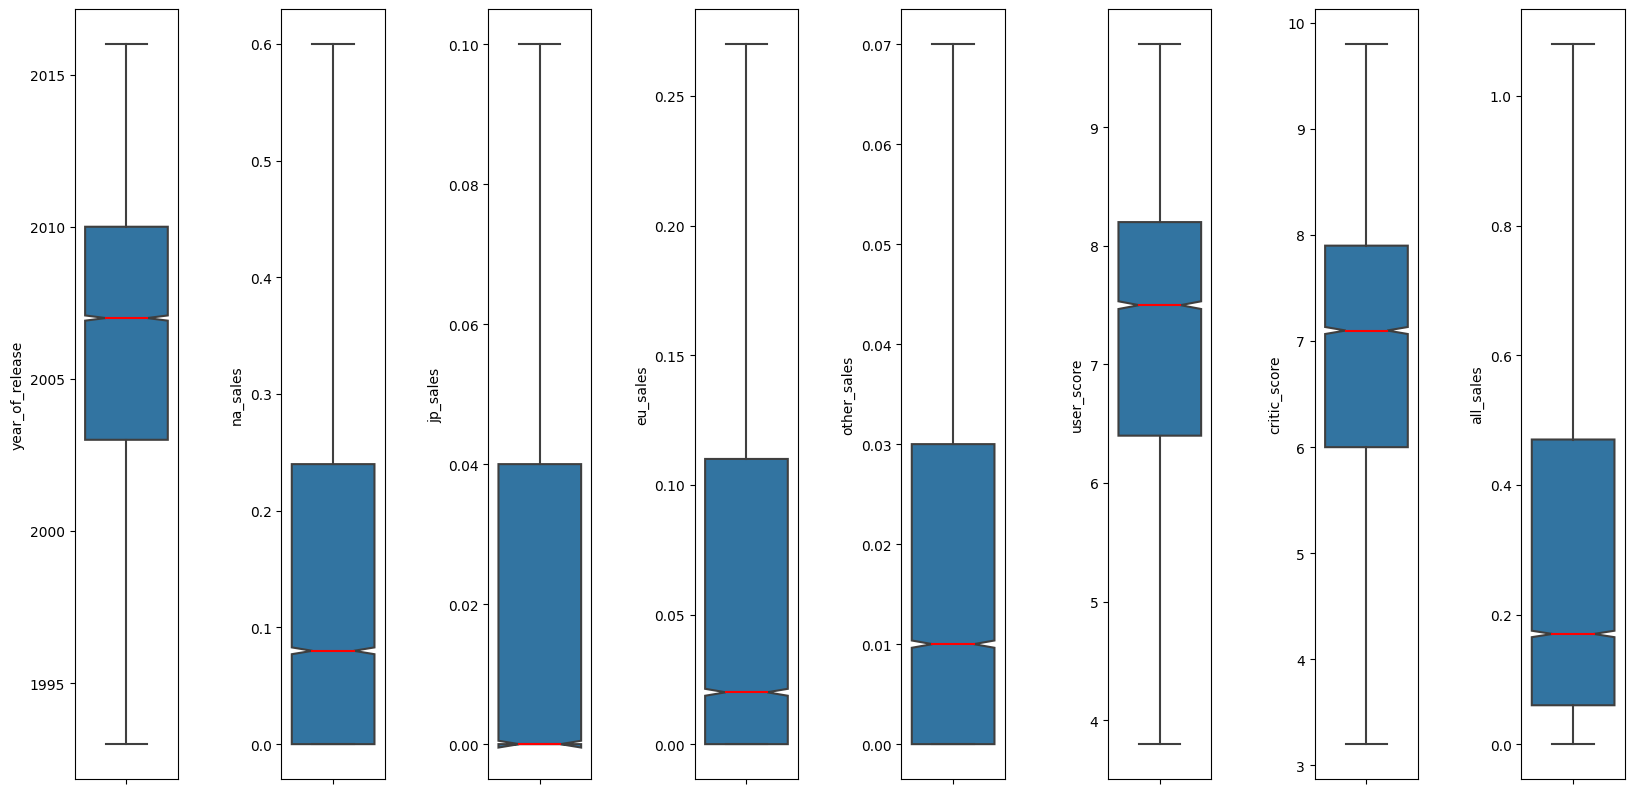

In [25]:
coll = ['year_of_release','na_sales','jp_sales','eu_sales','other_sales','user_score','critic_score', 'all_sales']
fig, ax = plt.subplots(ncols=len(coll), figsize=(20, 10))
plt.subplots_adjust(wspace=1)
for num, item in enumerate(coll):
    sns.boxplot(
        ax=ax[num],
        data=data_game,
        y=item,
        notch=True,
        medianprops={"color": "red"},
        showfliers = False)

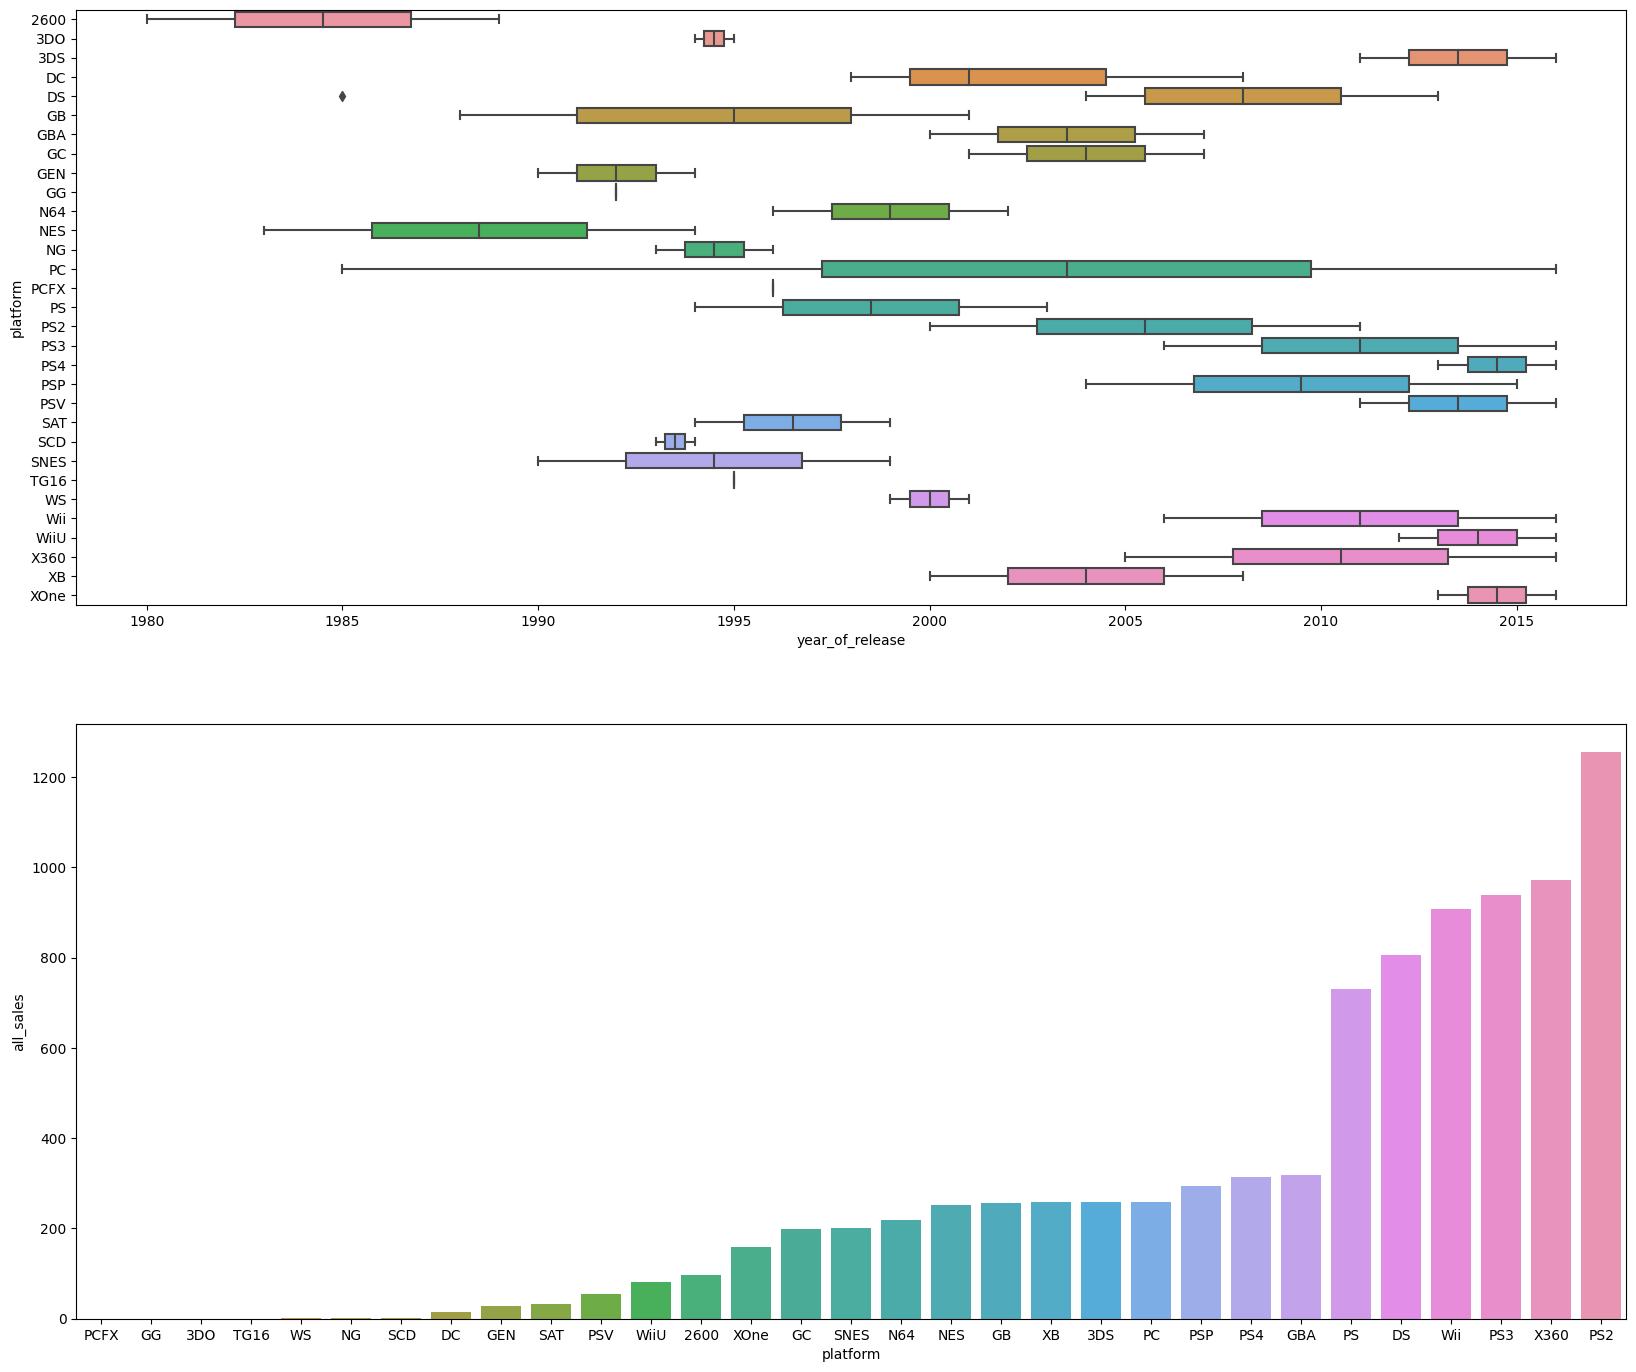

In [26]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 17))
sns.boxplot(ax=ax[0],
            data=data_game.pivot_table(
                index=['platform', 'year_of_release'],
                values='all_sales').reset_index(drop=False),
            x='year_of_release',
            y='platform',
           )
sns.barplot(ax=ax[1],
            data=(data_game[['platform', 'all_sales']]
                  .groupby(['platform'])
                  .sum()
                  .reset_index(drop=False)
                  .sort_values(by='all_sales')),
            x='platform',
            y='all_sales',
            ci=None,
           )
plt.show()

<div class="alert alert-info">
<b>Исправил</b>
<p>Добавил график по самым продаваемым платформам за весь период</p>
<ol>5 cамыx продаваемых платформ:
    <li> PS2
    <li> X360
    <li> PS3
    <li> Wii
    <li> DS
</ol>
</div>

распредиление платформ по годам

In [27]:
df = data_game.pivot_table(
    index='platform',
    values='year_of_release',
    aggfunc=('min','max')).reset_index(drop=False)

year_old = df.loc[
    (df.platform != 'PS') &
    (df['min'] > 0)].agg(lambda x: x['max']-x['min'], axis=1)
print(f'в среднем игровые платформы существуют около {year_old.mean():.0f} лет')


<div class="alert alert-info">
как было предположено ранее подьем начинается в 2014 году с выходом новых консолей, нужно проверить это предположение и если новые игровые приставки будут иметь большие продажи, то стоит остановится на переиоде с 2014 по 2016 год и определить перспективные платформы. 
<p> для этого сгруппируем данные по платформам за выбранный период и возьмем сумму всех продаж по платформе
</div>

In [28]:
df = data_game[data_game.year_of_release > 2013].pivot_table(
    index='platform',
    values='all_sales',
    aggfunc='sum').sort_values(by='all_sales',
                               ascending=False)

возьмем 8 платформ

In [29]:
best_platform = list(df.index[:8])

построим график по выбранным платформам

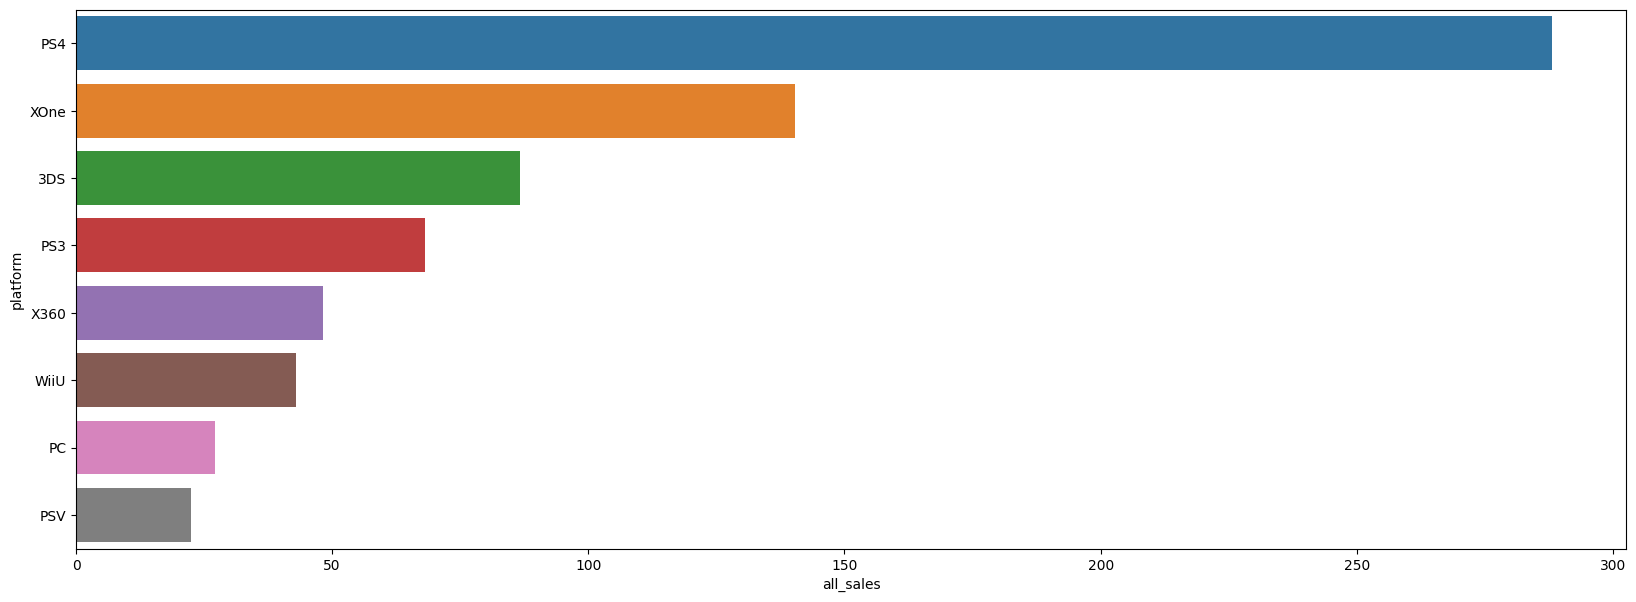

In [30]:
fig, ax = plt.subplots(figsize=(20,7))
df=df[df.index.isin(best_platform)]
sns.barplot(ax=ax, data=df, y=df.index, x='all_sales')
plt.show()

по графику новые платформы находятся в верху списка

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


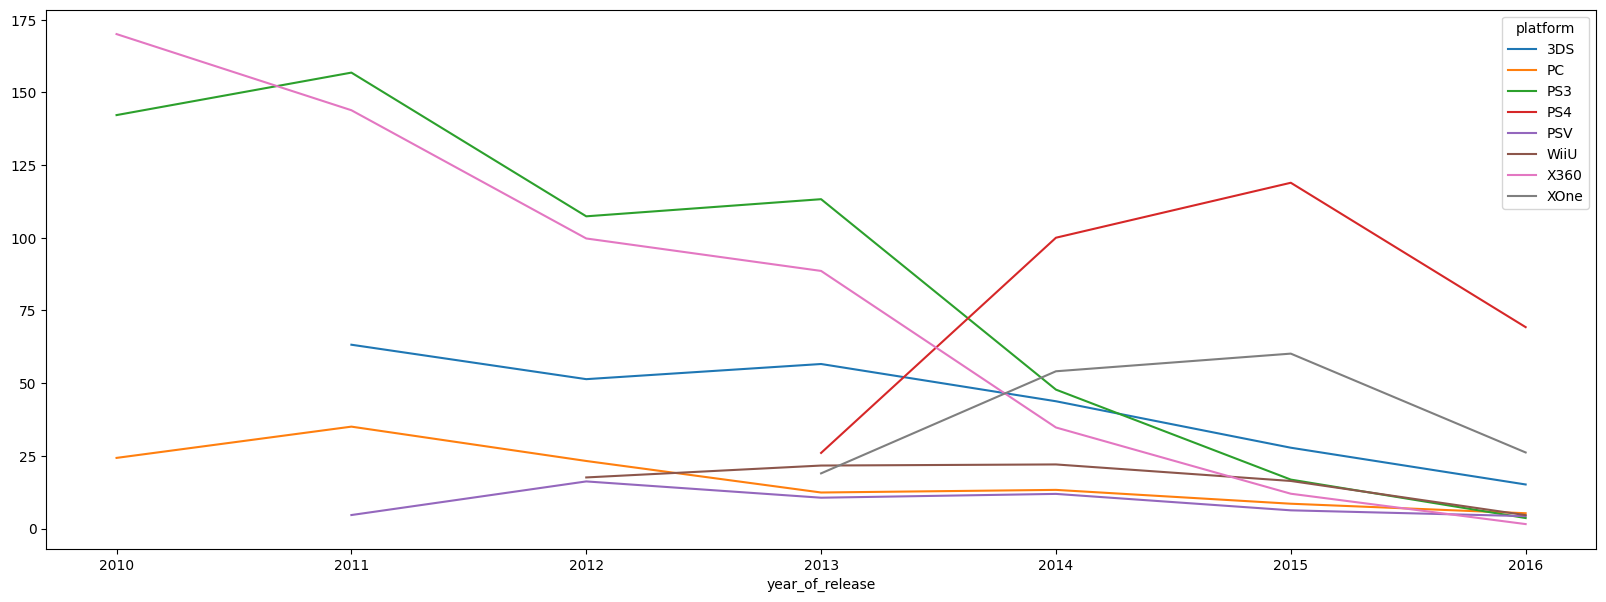

In [31]:
df = data_game.loc[
    (data_game.platform.isin(best_platform)) &
    (data_game.year_of_release >= 2010) &
    (data_game.year_of_release <= 2016)
].pivot_table(
    index=['year_of_release'],
    values='all_sales',
    columns='platform',
    aggfunc = 'sum',
    )
df.plot(figsize=(20,7));

все платформы показывают снижение на промежутке 2015-2016 год, однако учитывая, что данные за 2016 год не полные и рост двух платформ (XOne и PS4) на промежутке 2013-2015 можно выделить их как перспективные. платформа PS на этом же промежутке держится стабильно.   

In [32]:
df = data_game[
    (data_game.platform.isin(best_platform)) & 
    (data_game.year_of_release > 2013)
].pivot_table(
    
    index=['platform', 'year_of_release'],
    values='all_sales',
    aggfunc='sum'
).reset_index(drop=False).sort_values(by='all_sales', ascending=False)

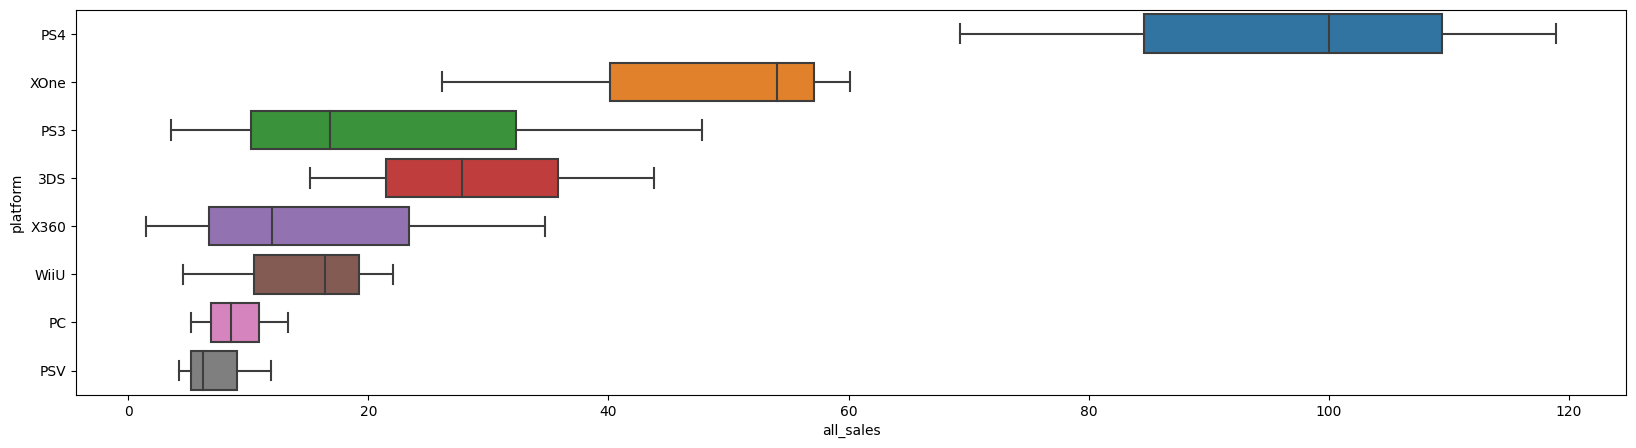

In [33]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(ax=ax,
            data=df,
            x='all_sales',
            y='platform',
           )
plt.show()

лидерами продаж являются игровые платформы PS4, XOne, 3DS и PS3. не смотря на то, что у PS3 максимальные продажи больше 
медиана 3DS находится выше по графику, значит продаж по ней больше.

Посмотритм, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

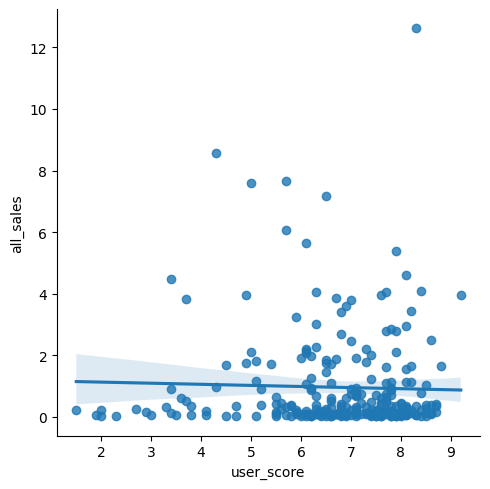

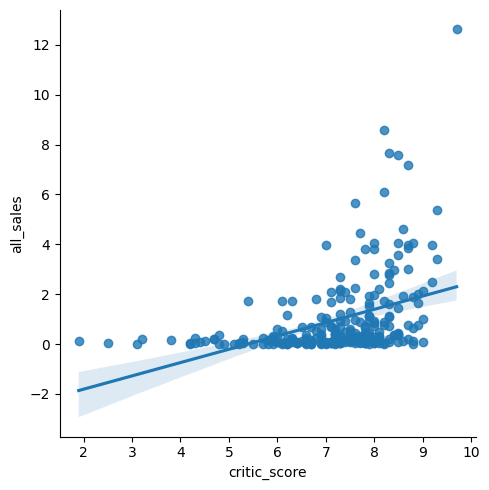

In [34]:
df = data_game.loc[data_game.platform=='PS4']
dick = {'user_score':'корреляция по пользовательским оценкам',
        'critic_score':'корреляция по оценке критиков'}
for n, i in enumerate(dick):
    print(f"{dick[i]} {df['all_sales'].corr(df[i]):.3f}")
    sns.lmplot(y='all_sales', x=i, data=df)
plt.show()

корреляция всех продаж по платформе PS4 от оценок критиков - положительная и сильная (0.4)
корреляция всех продаж по платформе PS4 от оценок пользователей - отрицательная и почи нулевая (-0.03)

Посмотрим, на зависимость продаж, на других платформах от отзывов пользователей и критиков.

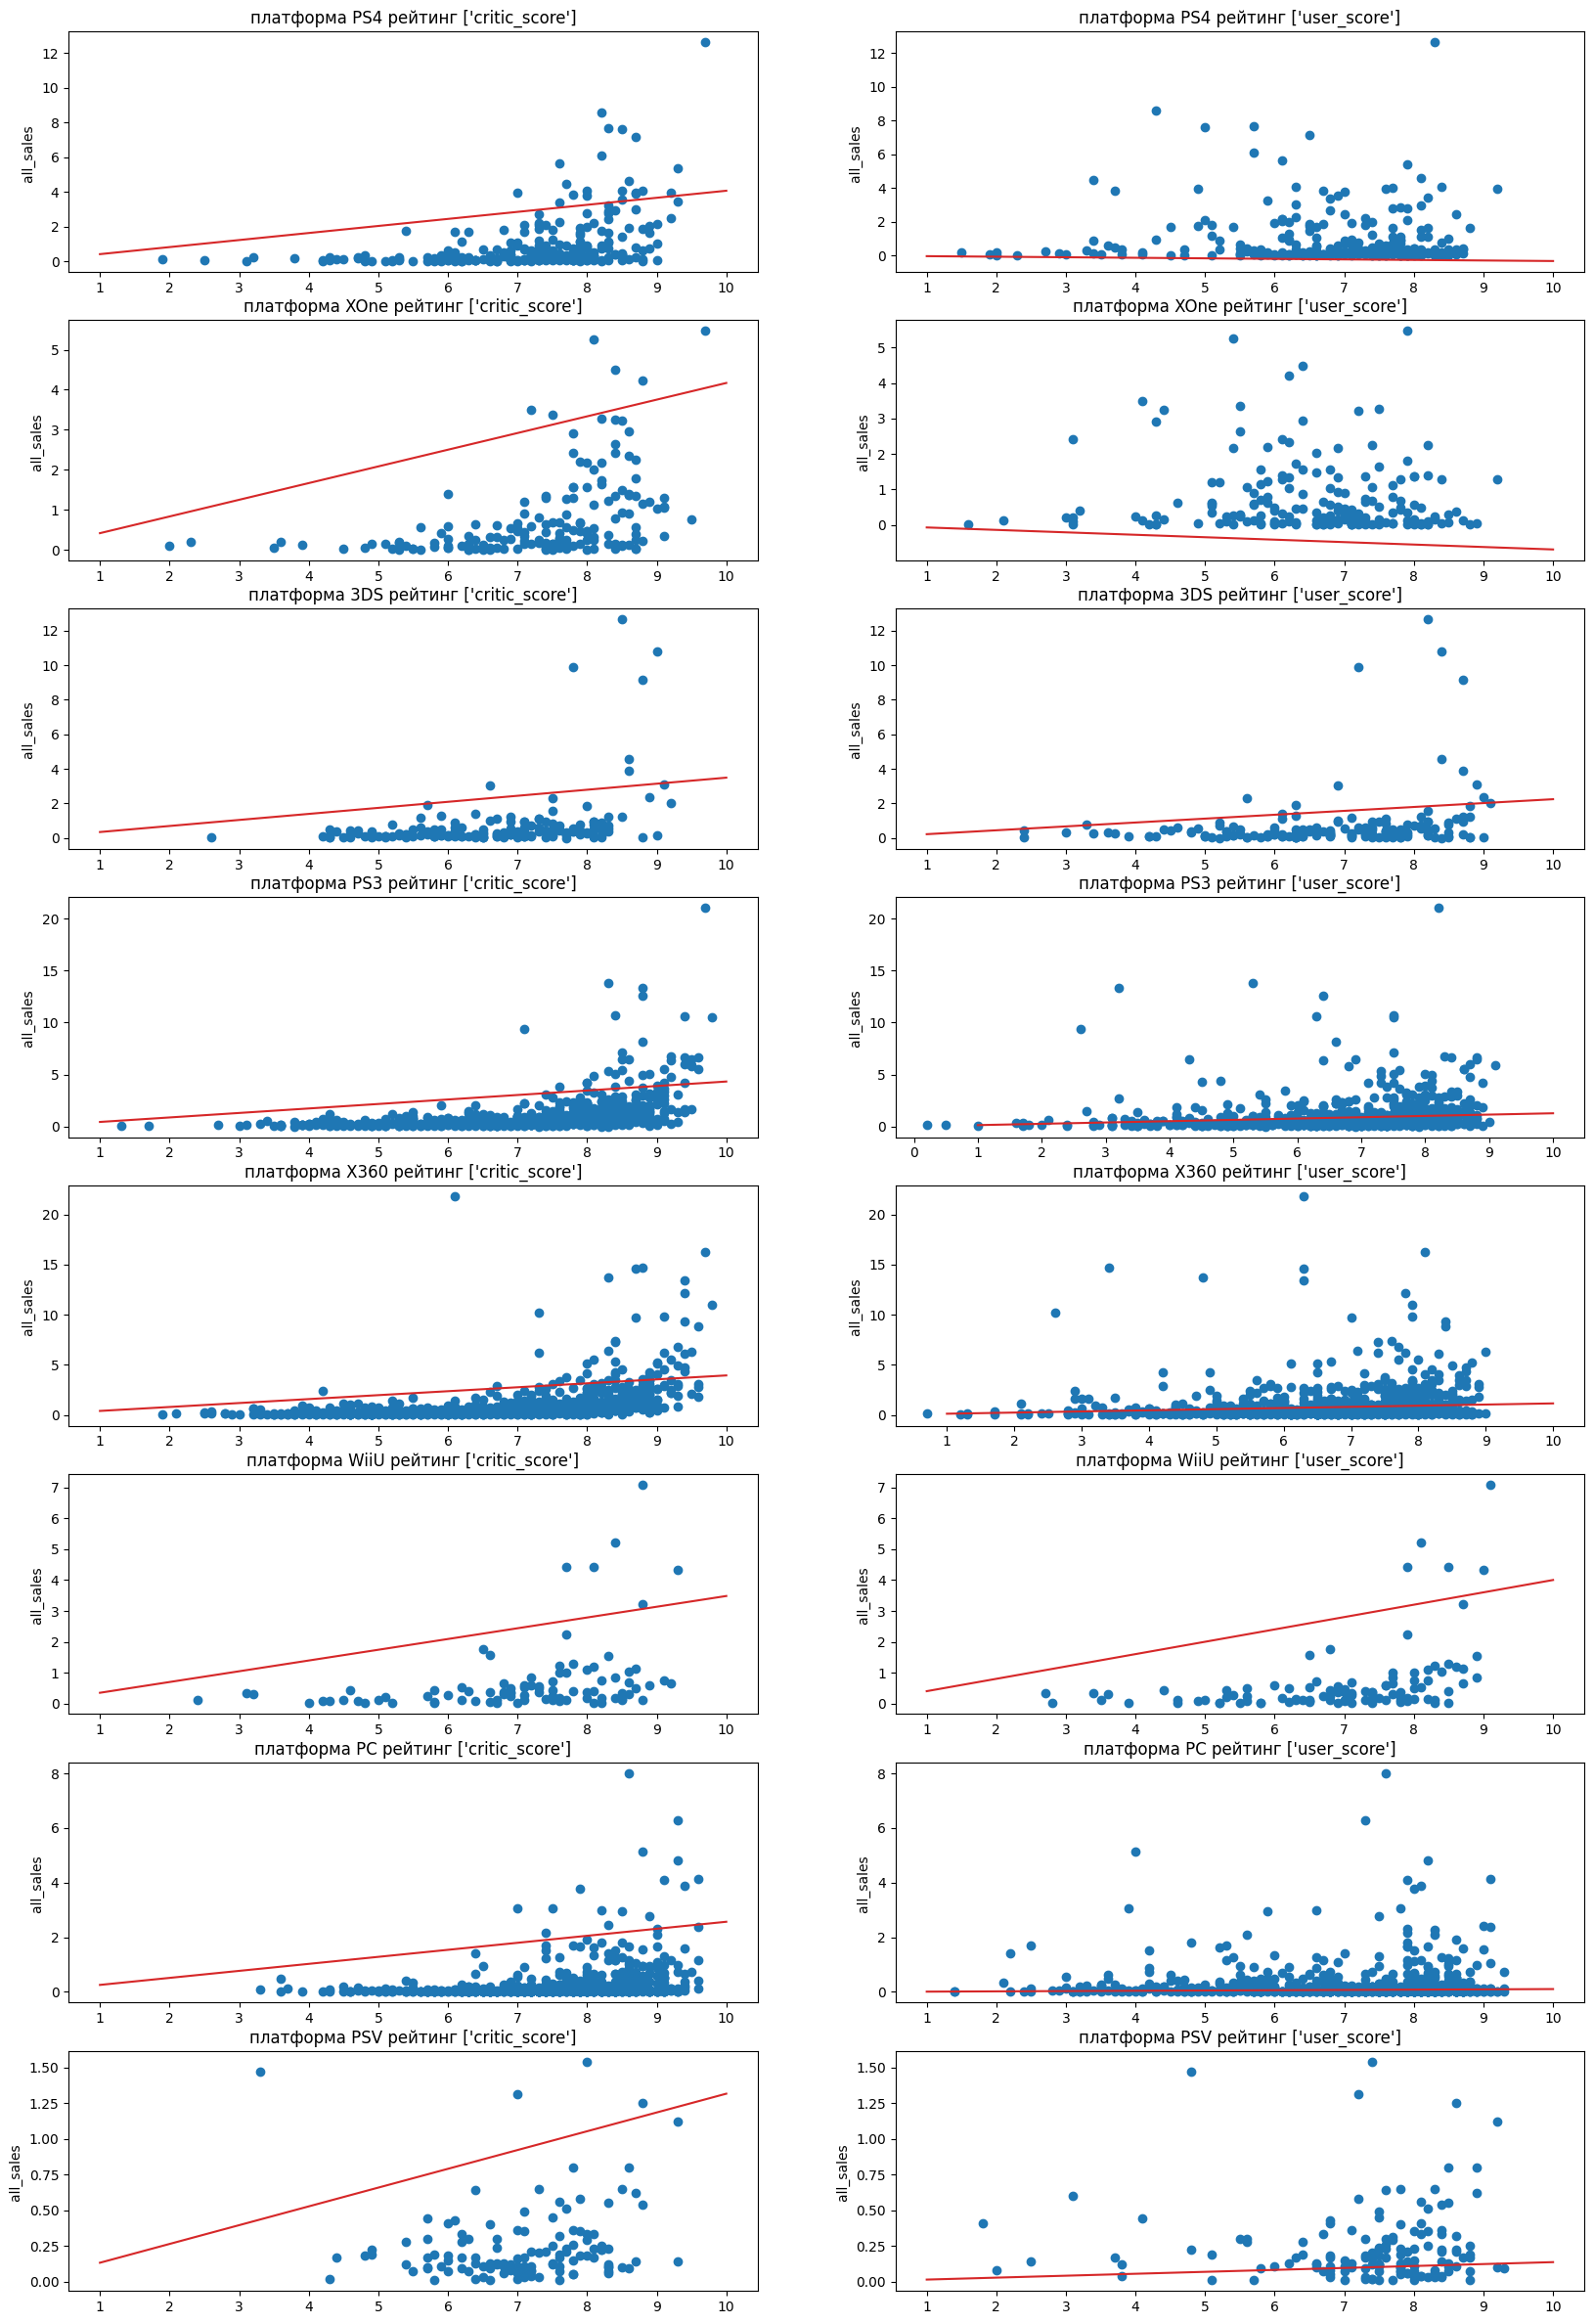

In [35]:
df = data_game.loc[(data_game.platform.isin(best_platform)) &
                  (data_game.year_of_release > 2013)]
how_to = ['critic_score', 'user_score']
fig, ax = plt.subplots(8, 2,  figsize=(20,30))

for col in range(len(ax)):
    for row in range(len(ax[col])):
    
        df = data_game.loc[data_game.platform == best_platform[col], ["all_sales", how_to[row]]]
        x = df[how_to[row]]
        y = df["all_sales"]
        ax[col, row].plot(x, y, 'o', color='tab:blue')
        ax[col, row].set_title(f'платформа {best_platform[col]} рейтинг {[how_to[row]]}')
        ax[col, row].set_ylabel('all_sales ')
        ax[col, row].set_xticks(list(range(0,11)))
        l_x = [1, 10]
        l_y = [df['all_sales'].corr(df[how_to[row]]) * i for i in l_x]
        ax[col, row].plot(l_x, l_y, '-', color='tab:red')
plt.show()

для лучших платформ ситуация сравнимая с PS4. оценка критиков сильнее и в положительную сторону влияет на продажи, оценки пользователей слабо коррелируют с подажами, кроме платформы WiiU и 3DS. Тут влияние оценки пользователей на число покупок совпадает с влиянием оценки критиков на число покупок.

Посмотрим на общее распределение игр по жанрам.

<div class="alert alert-info">
<p>Для этого сгруппируем данные по жанру и году выпуска, после 2014 года и  возмем сумму всех продаж, что позволит построить диаграмму размаха по всем жанрам видеоигр </p>
</div>

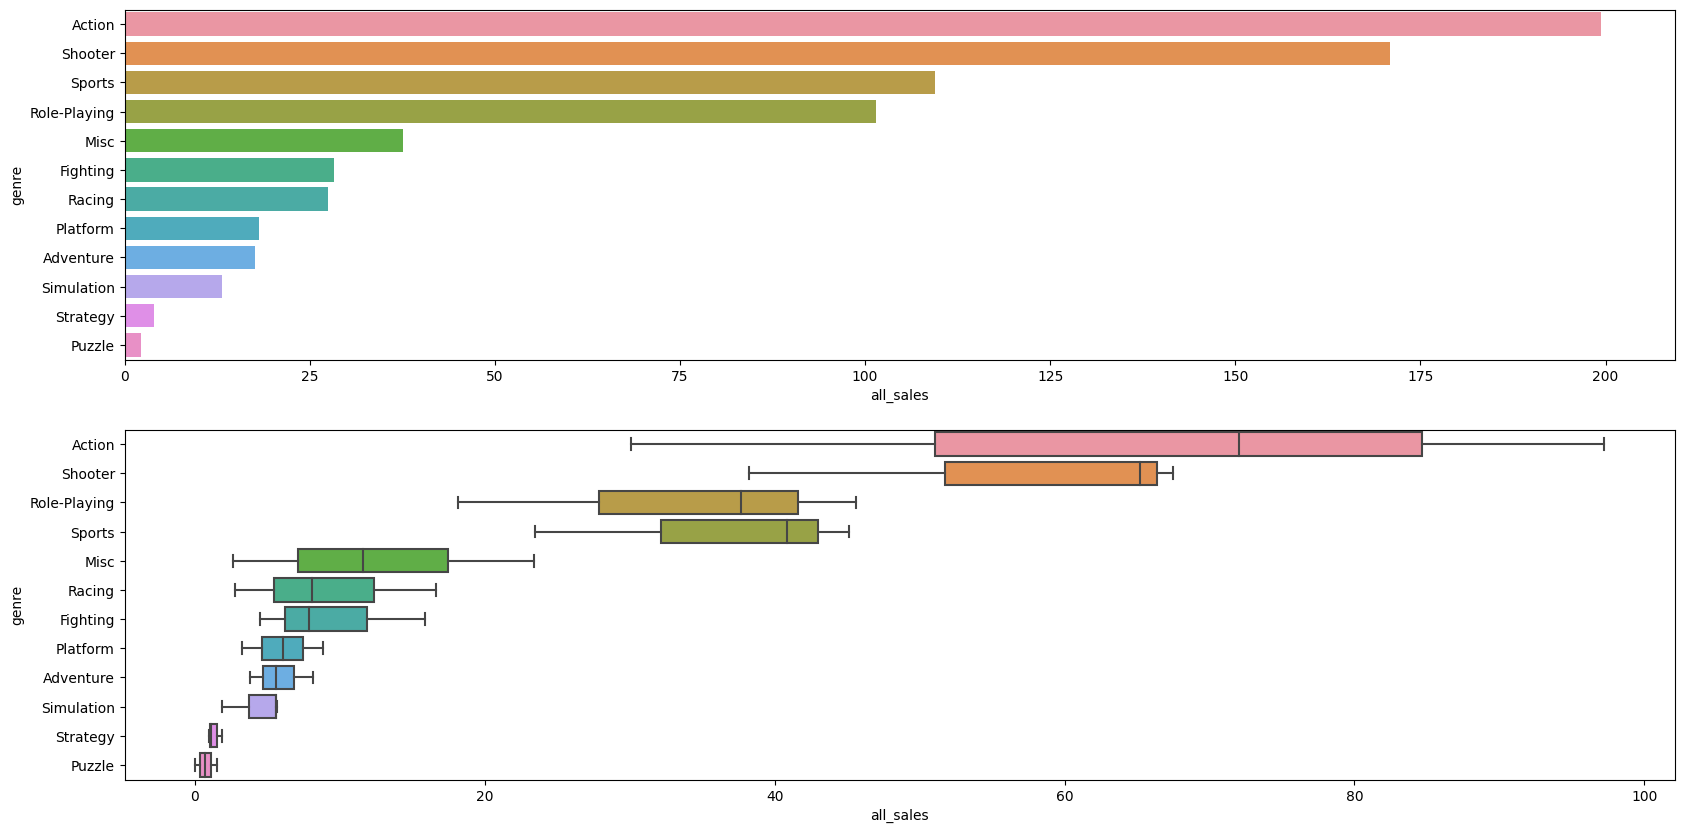

In [36]:
df = data_game[data_game.year_of_release >= 2014].pivot_table(
    index=['genre',],
    values='all_sales',
    aggfunc='sum',).reset_index(drop=False).sort_values(by='all_sales', ascending=False)
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
sns.barplot(ax=ax[0],
            data=df,
            x='all_sales',
            y='genre',
            ci=None
           )
df = data_game[data_game.year_of_release >= 2014].pivot_table(
    index=['genre','year_of_release'],
    values='all_sales',
    aggfunc='sum',).reset_index(drop=False).sort_values(by='all_sales', ascending=False)
sns.boxplot(ax=ax[1],
            data=df,
            x='all_sales',
            y='genre',
           )
plt.show()

<div class="alert alert-info">
<p>из гистограммы видно, что больше всего продаж наблюдается у видеоигр жанров Action, Shooter, Sports
<p>меньше всего продаж наблюдается у видеоигр жанров Simulation, Strategy, Puzzle
</div>

<div class="alert alert-info">
<b>Комментарий:</b>
<p> нужна сумма. выше добавил комментарий
</div>

<s>самыми прибыльными являются игры связанные с выполнением заданий и динамичные это шутеры, и ролевые игры
аутсайдеры по доходности это "статичные" пазлы, стратегии и симуляторы

### Краткие выводы
с 1993 года начался сильный рост игровой индустрии вероятно этому способствовало появление большого числа консолей. 
учитывая, что прогноз будет даваться на 2017 год, а средний срок жизни "консолей" равен 8 годам и учитывае появление в 2014 году новых консолей, расчет будет вестись от этого года
были выбраны 8 самых популярных платформ  и среди них выбраны перспиктивные (XOne и PS4 и PS)
лидерами продаж являются игровые платформы PS4, XOne, 3DS и PS3. не смотря на то, что у PS3 максимальное число продаж было больше медиана 3DS находится выше, это может говорить о том, что продажи у PS3 начинают снижаться.

для лучших платформ были построены графики рассеяния и кореляции, на которых видно, что оценка критиков сильнее и в положительную сторону влияет на продажи игр, а оценки пользователей слабо коррелируют спродажами,  кроме платформы WiiU и 3DS. Тут влияние оценки пользователей совпадает с влиянием оценки критиков на число покупок.

пострроен график числа продаж игр. распределение по прибыльности жанров выглядит следующим образом:
<ol>
<li>`Action`, </li>
<li>`Shooter`,</li>
<li>`Sports`, </li>
<li>`Role-Playing`,</li>
<li>`Misc`,</li>
<li>`Fighting`,</li>
<li>`Racing`,</li>
<li>`Platform`,</li>
<li>`Adventure`,</li>
<li>`Simulation`,</li>
<li>`Strategy`,</li>
<li>`Puzzle`</li>
</ol>    

# Составим портрет пользователя для регионов (NA, EU, JP)

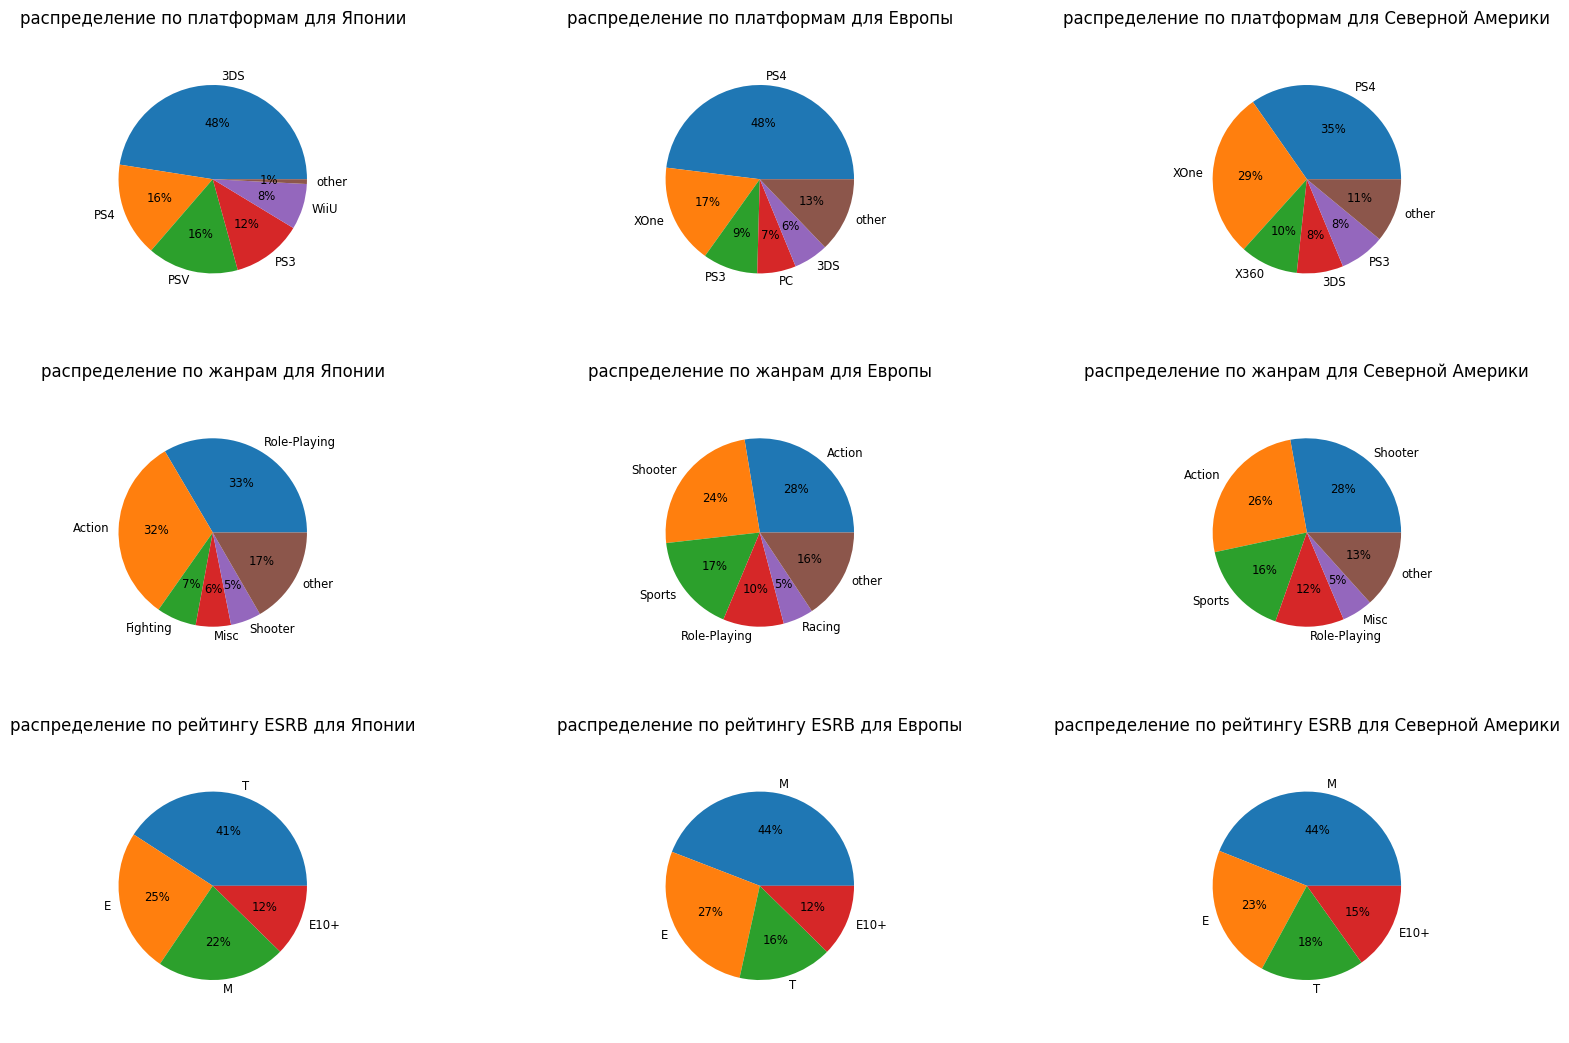

In [37]:
reg = {
    'jp_sales': 'Японии',
    'eu_sales': 'Европы',
    'na_sales': 'Северной Америки',
}
how_to = {
    'platform':'платформам',
    'genre':'жанрам',
    'rating' :'рейтингу ESRB',
}
count = 5
fig, ax = plt.subplots(len(how_to), len(reg), sharex=True, figsize=(20,13))

for col in range(len(ax)):
    how_itm = list(how_to.keys())[col]
    
    df = data_game[data_game.year_of_release >= 2014].pivot_table(
        index=how_itm,
        values=reg,
        aggfunc='sum').reset_index(drop=False)
    
    for row in range(len(ax[col])):
        reg_itm = list(reg.keys())[row]    
        tmp = df.sort_values(by=reg_itm, ascending=False)
        
        fracs = list(tmp[reg_itm][: count])
        labels = list(tmp[how_itm][: count])
        
        if len(df) > count:
            fracs.append(tmp[reg_itm][count: ].sum())         
            labels.append('other') 
        ax[col, row].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.8)
        ax[col, row].set_title(f'распределение по {how_to[how_itm]} для {reg[reg_itm]}')
plt.show()


предпочтения пользователей в регионах Европы и Северной Америки, в выборе игровой платформы, совпадают. Чаще всего там используют PS4 и XOne, и преобритают игры с возрастным ограничением "для взрослых" (M - 18+), вторыми по поулярности идут игры без ограничения по возрату (E). предпочтения в жанрах также схожи, чаще выбрают игры жанра Shooter и Action. разница заключается в том, что в Европе игры жанра Action приобретали на 4 процентов чаще, чем игры жанра Shooter, а в Северной Америке игры жанра Shooter приобретали на 2% чаще.

предпочтения пользователей из Японии отличаются от двух предидущих. так выбор игровой платформы тут в основном останавливают на 3DS и выбирают игры в стиле Role-Playing с возрасным ограничением "для подростков" (Т - для пользователей - старше 13 лет)

## Краткие выводы.

оценка критиков сильнее влияет на обьем продаж, оценки пользователей слабо коррелируют с подажами, кроме платформы WiiU и 3DS. Тут влияние оценки пользователей на число покупок совпадает с оценкой критиков.

предпочтения пользователей в Европейском регионе и Северной Америки, в выборе игровых платформ, совпадают. Чаще всего в этих регионах используют Play Station 4 и Xbox One. в этих региоах чаще всего преобритают игры с возрастным ограничением "для взрослых" (M - 18+), и игры без ограничения по возрату (E). в Европейском регионе игры жанра Action приобретали на 4 процента чаще, чем второй по популярности жанр Shooter.
в регионе Северной Америки игры жанра Shooter приобретали на 2% чаще.
типичный пользователь из японии предпочитает 3DS от Nintendo и игры в стиле Role-Playing с возрасным ограничением "для подростков" (Т - для пользователей - старше 13 лет)

по популярности первая тройка жанров составила  Action, Shooter и Role-Playing. последний жанр попал в положительную статистику благодоря его популярности в Японии


# Сформулируем и проверим гипотезы



проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PlayStation одинаковые.

определим гипотезы:

<li>H_0: средние пользовательские рейтинги платформ Xbox One и PC равны
<li>H_1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [38]:
x_box_score = data_game.loc[
    (data_game.platform == 'XOne') &
    (data_game.year_of_release >= 2014) &
    (~data_game.user_score.isna()), 'user_score']
pc_score = data_game.loc[
    (data_game.platform == 'PC') &
    (data_game.year_of_release >= 2014) &
    (~data_game.user_score.isna()), 'user_score']

тк выборки независимы используем t-критерий Стьюдента

In [39]:
res = st.ttest_ind(x_box_score, pc_score, equal_var=False)

alpha = 0.05

print('p-значение:', f'{res.pvalue:.3f}')

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')



проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

определим гипотезы:

H_0: средние пользовательские рейтинги жанров Action и Sports равны

H_1: средние пользовательские рейтинги жанров Action и Sports не равны


In [40]:
action_score = data_game.loc[
    (data_game.genre == 'Action') &
    (data_game.year_of_release >= 2014) &
    (~data_game.user_score.isna()), 'user_score']
sorts_score = data_game.loc[
    (data_game.genre == 'Sports') &
    (data_game.year_of_release >= 2014) &
    (~data_game.user_score.isna()), 'user_score']

In [41]:
res = st.ttest_ind(action_score, sorts_score)

alpha = 0.05

print('p-значение:', f'{res.pvalue:.20f}')

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

## Выводы

в ходе работы над проектом были исследованы данные до 2016 года о продажах видеоигр.

В ходе реализации проекта выполнены следующие задачи:

<p> Определены успешные платформы и жанры видеоигр, относительно региона продажи
<p> Составлен примерный портрет пользователя видеоигр, относительно региона продажи
<ol>Проверены гипотезы:
    <li>средние пользовательские рейтинги платформ Xbox One и PlayStation одинаковые.</li>
    <li>средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные</li>
</ol>
<ol>В ходе работой над проектом были проведены этапы:

<li>Предварительный анализ данных</li>
<li>Предобработка данных</li>
<li>Исследовательский анализ данных</li>
<li>Составлен портрет пользователя каждого региона 
<li>Проверка гипотез</li>
</ol>

<ol>
<li>В ходе предварительного анализа данных
    <ol>
        <li>выявленны проблемы в данных,
        <li>столбцы с пропусками,
        <li>столбцы с некорректными названиями и некорректными типами данных
    </ol>
<li>В ходе предобработки данных":
    <ol>
        <li>рассмотрены и изучены пропущенные значения
        <li>Удалены 2 строки с отсуствующими данными по столбцу содержащему название видеоигры
        <li>Проверены данные на явные дубликаты
        <li>оставлены без заполнения пропуски в столюцах:
            <ol>
                <li> год выпуска;</li>
                <li> название;</li>
                <li> жанр;</li>
                <li> оценки криттиков и пользовательские;</li>
                <li> возрастной ценз.</li>
            </ol>
        <li> Столбцы с оценками критиков и пользователей приведены к одному виду</li>
        <li>Рассмотрено и обработано значение tbd в столбце с пользовательской оценкой</li>
        <li>Произведено преобразование типов данных</li>
        <li>Добавлен столбец с информацией о суммарных продажах игр во всех регионах</li>
    </ol>
<li>В ходе реализации "исследовательского анализа данных":
    <ol>
        <li> Установлено, что с 1993 года начался сильный рост игровой индустрии, что может быть обусловлено поялением 32 битных консолей, и новых игр к ним. спады в районе 1999-2000 и 2003-2004 насыщение рынка или падение объемов производства новых консолей, что привело к их дефициту и снижению числа новых пользователей и как следствие - продаж видеоигр. сильный спад в 2010 это скорее всего насыщение рынка и отсутствие интересных видеоигр. начало роста с 2014 по 2015 года обусловлен появлением новых консолей.
        <li>Расчитаны 5 cамыx продаваемых платформ за все время наблюдений:
            <ol>
                <li> PS2
                <li> X360
                <li> PS3
                <li> Wii
                <li> DS
            </ol>
        <li>Были выбраны 8 самых популярных платформ и свмые перспиктивные среди них (XOne, PS4 и 3DS)</li>
        <li>Выяснены лидеры продаж, которыми являются игровые платформы PS4, XOne, 3DS и PS3. не смотря на то, что у PS3 максимальное число продаж было больше медиана 3DS находится выше, это может говорить о том, что продажи у PS3 начинают снижаться. </li>
        <li>Для лучших платформ были построены графики рассеяния и кореляции, на которых видно, что оценка критиков сильнее и в положительную сторону влияет на продажи игр, а оценки пользователей слабо коррелируют спродажами, кроме платформы WiiU и 3DS. Тут влияние оценки пользователей совпадает с влиянием оценки критиков на число покупок.</li>
        <li>Распределение по прибыльности жанров выглядит следующим образом:
            <ol>
                <li>`Action`, </li>
                <li>`Shooter`,</li>
                <li>`Sports`, </li>
                <li>`Role-Playing`,</li>
                <li>`Misc`,</li>
                <li>`Fighting`,</li>
                <li>`Racing`,</li>
                <li>`Platform`,</li>
                <li>`Adventure`,</li>
                <li>`Simulation`,</li>
                <li>`Strategy`,</li>
                <li>`Puzzle`</li>
            </ol>    
        <li> Установлено, что средний срок жизни игровых консолей составляет около 8 лет
    </ol>
<li>составлен портрет пользователя по регионам:
    <ol>
       <li>Япония,</li>
       <li>Европа',</li>
       <li>Северная Америка',</li>
    </ol>
    <ol>
        <li>Предпочтения пользователей в Европейском регионе и Северной Америке, в выборе игровых платформ, совпадают. Чаще всего в этих регионах используют Play Station 4 и Xbox One.
чаще всего тут преобритают игры с возрастным ограничением "для взрослых" (M - 18+), и игры без ограничения по возрату (E). в Европейском регионе игры жанра Action приобретали на 4 процента чаще, чем второй по популярности жанр Shooter. в регионе Северной Америки игры жанра Shooter приобретали на 2% чаще.
        <li>типичный пользователь из японии предпочитает 3DS от Nintendo и игры в стиле Role-Playing с возрасным ограничением "для подростков" (Т - для пользователей - старше 13 лет)
    </ol>
<li> В ходе проверки гипотез были сформулированы и проверены гипотезы:
    <ol>
        <li>Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
        <p><b> гипотеза не подтвердилась </b></p>
        <li>Cредние пользовательские рейтинги платформ Xbox One и PlayStation одинаковые.
        <p><b> гипотеза подтвердилась </b></p>
    </ol>
<li>рекомендации по рекламной компании:
    <ol>
        <li> В случае проведения продаж в Европейском регионе или регионах Северной Америки  основной упор делать на консоли PS4 и XOne, отдать предпочтение видеоиграм жанров Action, Shooter и Sports
        <li> 3DS и PS4, в случае продаж в Японии, отдать предпочтение видеоиграм жанров Role-Playing и Action
        <li>Для всех регионов полезно обрашать на оценки видеоигр, которые дают критики, так как их положительная оценка прямо влияет на продажи.
    </ol> 
</ol>